# Week 4:

This notebook is to accompany the _Week 3_ content.

Version 1.0, updated 02/07/2024 by AJM

## Import packages

To streamline operations in Python, packages can be imported to perform a host of various tasks. To make this process as simple as possible, most of the required packages for the course are included in the file [`Atomic.py`](https://github.com/Andy-UTAS/Solid-state/blob/master/SSP.py). For this section, we also make use of the [`OBE_Python_Tools`](https://github.com/LucyDownes/OBE_Python_Tools) package to aid with solving the optical Bloch equations.

As usual, we begin by importing all of the content required for our calculations:

In [1]:
from Atomic import *
import OBE_Tools as OBE

Matplotlib 3.7.1
NumPy 1.25.0


In [21]:
jupytext --execute runAll

SyntaxError: invalid syntax (1990835402.py, line 1)

In [46]:
savefig = True
week = 4

def cleanfiles(pre):
    try:
        import os

        def delete_files_with_prefix(directory, prefix):
            try:
                for filename in os.listdir(directory):
                    if filename.startswith(prefix):
                        file_path = os.path.join(directory, filename)
                        if os.path.isfile(file_path):
                            os.remove(file_path)
                            print(f"Deleted file: {file_path}")
                print("Deletion process completed.")
            except Exception as e:
                print(f"An error occurred: {e}")

        # Example usage
        directory_path = 'Images'
        file_prefix = pre
        delete_files_with_prefix(directory_path, file_prefix)
    except isinstance(test, str):
        print(f"Specified prefix is not a string")
    
if savefig:
    leader = 'w'+str(week)
    cleanfiles(leader)
    counter = 1
    
def savefigure():
    title = plt.gca().get_title().replace(" ", "_")
    filepath = 'Images/'+'leader'+str(counter).zfill(2)+'title.svg'
    plt.savefig(filepath, bbox_inches= 'tight')
    print(f"Image {filepath} exported")

Deletion process completed.


## Optical Bloch Equations

### Steady-state solutions

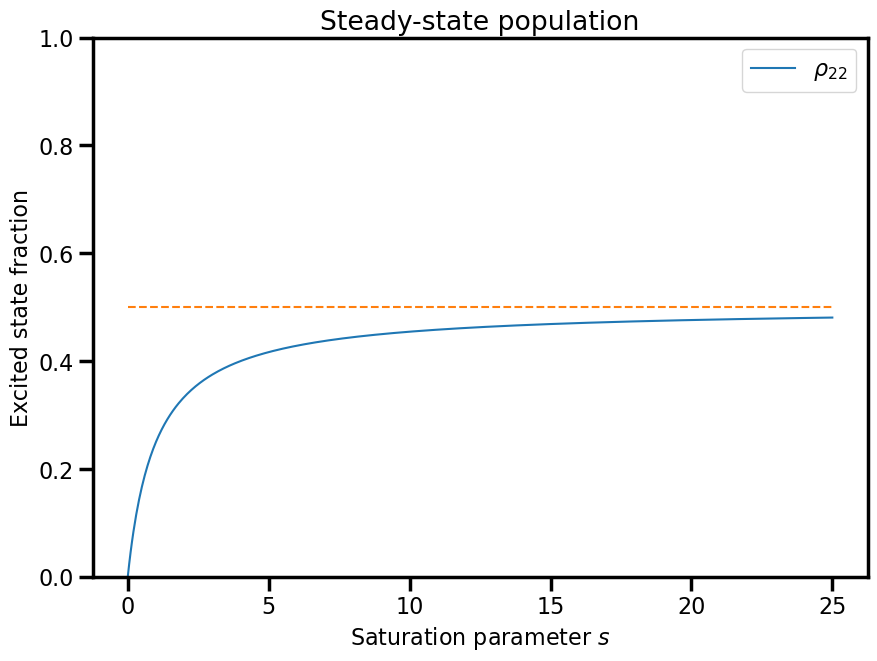

In [47]:
def sat(omega, Gamma, Delta):
    return 2 * (omega/Gamma) ** 2 / (1 + (2*Delta/Gamma) ** 2)

def rho22_sat(s):
    """
    Calculate the blackbody radiation spectrum using Planck's law.
    
    Parameters:
    omega (array): Wavelengths in meters.
    a_21 (float): Temperature in Kelvin.
    omega_21 (float):
    
    Returns:
    array: Spectral radiance (W/sr/m^3)
    """
        
    return (s/2)/(1+s)

sat = np.linspace(0,25,500)

plt.figure()
plt.plot(sat, rho22_sat(sat), label = r'$\rho_{22}$')
plt.hlines(0.5,0,25, linestyles = 'dashed', color = 'C1')
plt.ylim(0,1)
plt.xlabel('Saturation parameter $s$')
plt.ylabel('Excited state fraction')
plt.title('Steady-state population')
plt.legend()

if True: # Change to True to save the figures
    plt.savefig('Images/w4_01_Steady-state_populatio.svg', bbox_inches= 'tight')

plt.show()

In [ ]:
omega = 10e6
Gamma =

times = np.linspace(0,8*pi,500)
rho_0 = np.transpose(np.asarray([1,0,0,0]))
rho_t = np.zeros((len(times),4))
pops = np.zeros((len(times),2))

for i, t in enumerate(times):
    sol = OBE.time_evolve(M, t, rho_0) # perform the time evolution
    rho_11, rho_22 = np.real(sol[0]), np.real(sol[3]) #extract the populations from the solution array
    factor = rho_11 + rho_22
    popn = [rho_11, rho_22]
    pops[i,:] = popn/factor # store normalised populations in array
    
plt.figure()
plt.plot(times/(2*pi), pops[:,0], label = r'$\rho_{11}$')
plt.plot(times/(2*pi), pops[:,1], label = r'$\rho_{22}$')
plt.xlabel('Time [$2\pi/\Omega$]')
plt.ylabel('Population')
plt.title('State populations')
plt.legend()

if True: # Change to True to save the figures
    plt.savefig('Images/w4_01_nodecay.svg', bbox_inches= 'tight')

plt.show()

### State populations

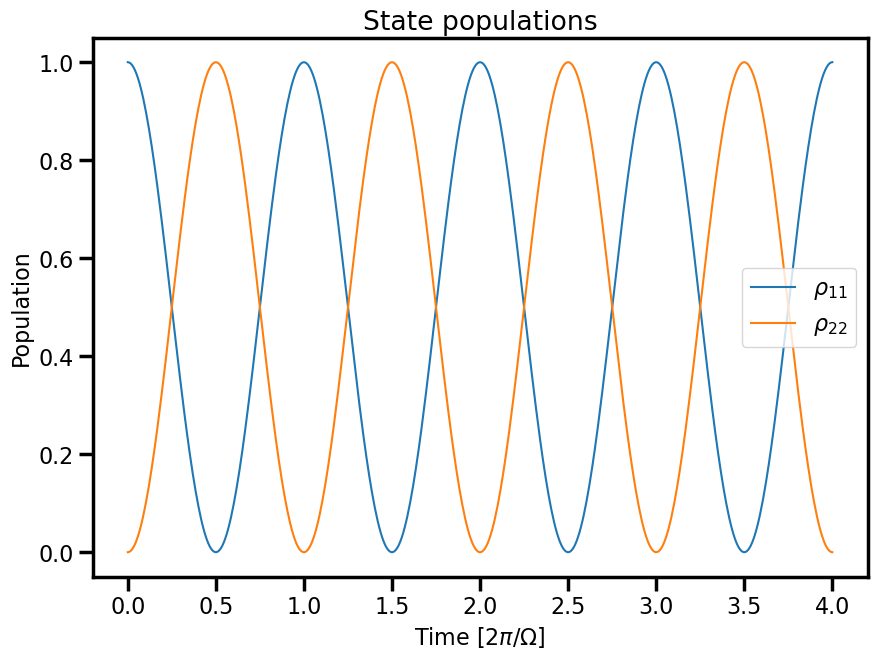

In [19]:
Omegas = [1]  #2pi MHz
Deltas = [0]  #2pi MHz
Gammas = [0]  #2pi MHz
M = OBE.time_dep_matrix(Omegas, Deltas, Gammas)

times = np.linspace(0,8*pi,500)
rho_0 = np.transpose(np.asarray([1,0,0,0]))
rho_t = np.zeros((len(times),4))
pops = np.zeros((len(times),2))

for i, t in enumerate(times):
    sol = OBE.time_evolve(M, t, rho_0) # perform the time evolution
    rho_11, rho_22 = np.real(sol[0]), np.real(sol[3]) #extract the populations from the solution array
    factor = rho_11 + rho_22
    popn = [rho_11, rho_22]
    pops[i,:] = popn/factor # store normalised populations in array
    
plt.figure()
plt.plot(times/(2*pi), pops[:,0], label = r'$\rho_{11}$')
plt.plot(times/(2*pi), pops[:,1], label = r'$\rho_{22}$')
plt.xlabel('Time [$2\pi/\Omega$]')
plt.ylabel('Population')
plt.title('State populations')
plt.legend()

if True: # Change to True to save the figures
    plt.savefig('Images/w4_01_nodecay.svg', bbox_inches= 'tight')

plt.show()

### Einstein rate equations

$$\Gamma = A_{12}$$

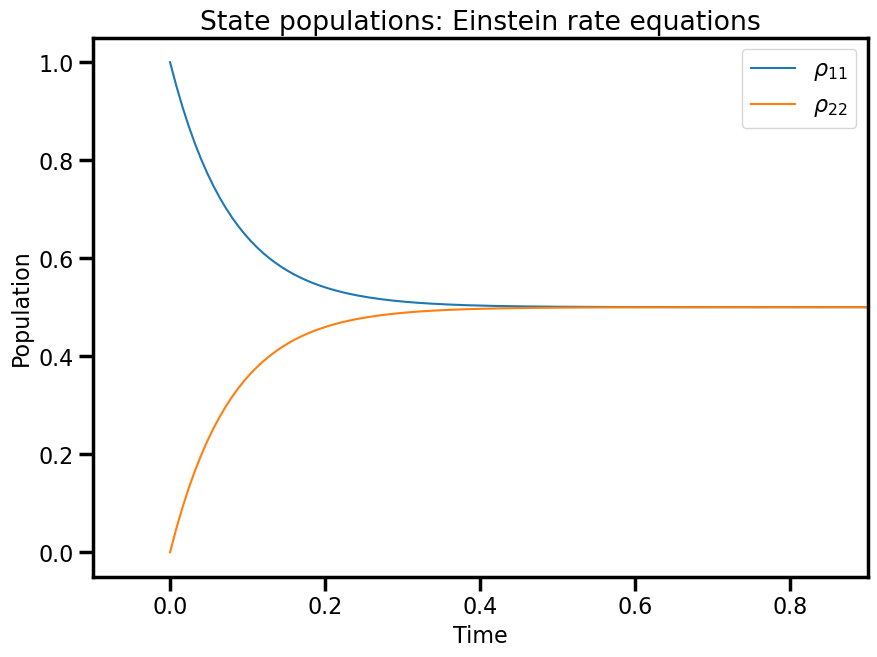

In [32]:
def rho_bb(w, T):
    return (hbar/((pi ** 2) * (c ** 3))) * ((w ** 3)/(np.exp((hbar * w)/(kb * T)) - 1))

def einstein_rate_equations(y, t, a_coeff, b_coeff):
    n1, n2 = y
    n1dt = -n1*b_coeff + n2*b_coeff + n2*a_coeff
    n2dt = n1*b_coeff - n2*b_coeff - n2*a_coeff
    return [n1dt, n2dt]

T = 300

a_coeff = 0
# b_coeff = b * rho_bb(w, T)
b_coeff = 1

y0 = [1.0, 0.0] 
 
solutions = integrate.odeint(einstein_rate_equations, y0, times, args=(a_coeff, b_coeff))
 
n1_values = solutions[:, 0]
n2_values = solutions[:, 1]
 
plt.plot(times/(2*pi), n1_values, label=r'$\rho_{11}$')
plt.plot(times/(2*pi), n2_values, label=r'$\rho_{22}$')
plt.xlim(-0.1,.9)
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('State populations: Einstein rate equations')

if True: # Change to True to save the figures
    plt.savefig('Images/w4_02_Einstein.svg', bbox_inches= 'tight')

plt.show()

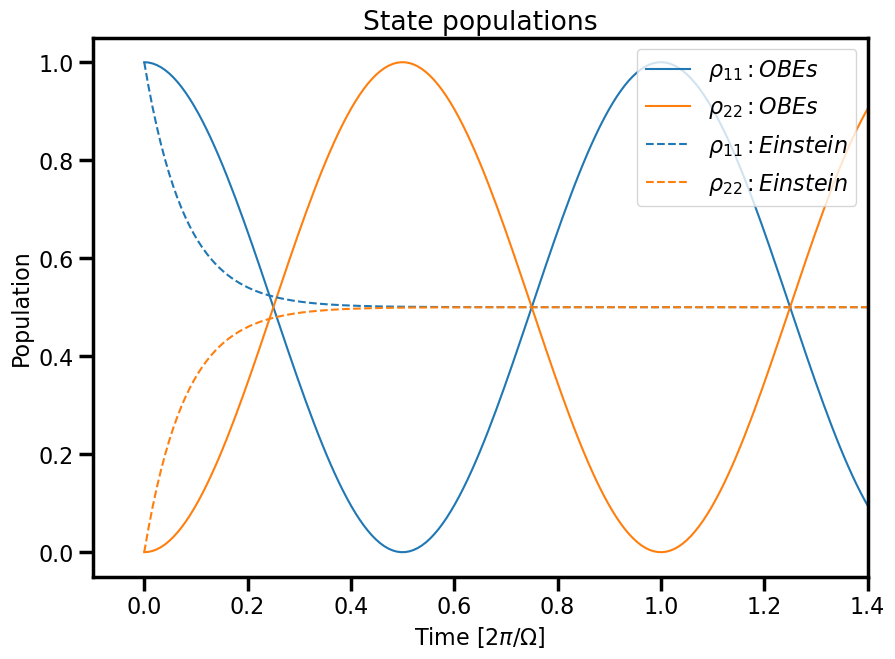

In [31]:
plt.figure()
plt.plot(times/(2*pi), pops[:,0], label = r'$\rho_{11}: OBEs$')
plt.plot(times/(2*pi), pops[:,1], label = r'$\rho_{22}: OBEs$')
plt.plot(times/(2*pi), n1_values, '--', color = 'C0', label=r'$\rho_{11}: Einstein$')
plt.plot(times/(2*pi), n2_values, '--', color = 'C1', label=r'$\rho_{22}: Einstein$')
plt.xlim(-0.1, 1.4)
plt.xlabel('Time [$2\pi/\Omega$]')
plt.ylabel('Population')
plt.title('State populations')
plt.legend()

if True: # Change to True to save the figures
    plt.savefig('Images/w4_03_bloch-einstein-nodecay.svg', bbox_inches= 'tight')

plt.show()

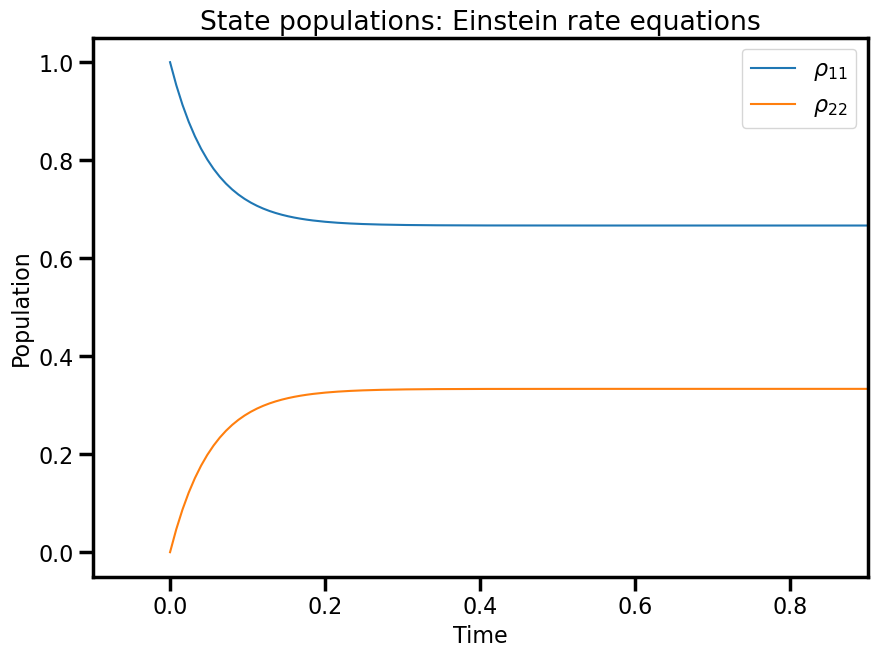

In [36]:
a_coeff = 1
# b_coeff = b * rho_bb(w, T)
b_coeff = 1

y0 = [1.0, 0.0] 
 
solutions = integrate.odeint(einstein_rate_equations, y0, times, args=(a_coeff, b_coeff))
 
n1_values = solutions[:, 0]
n2_values = solutions[:, 1]
 
plt.plot(times/(2*pi), n1_values, label=r'$\rho_{11}$')
plt.plot(times/(2*pi), n2_values, label=r'$\rho_{22}$')
plt.xlim(-0.1,.9)
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('State populations: Einstein rate equations')

if True: # Change to True to save the figures
    plt.savefig('Images/w4_04_Einstein-with-decay.svg', bbox_inches= 'tight')

plt.show()